Burgers' equation is a combination of diffusion and convection equations seen in previous parts. In one dimension, it is as follows:

$$\frac{\delta u}{\delta t} + u \frac{\delta u}{\delta x} = v \frac{\delta ^2 u}{\delta x^2}$$

We can discretise this using the steps seen before:

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = v \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

And rearrange to make the next time-step term the subject:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n) + v \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

The boundary condition for this problem will be $u(0) = u(2\pi)$

For a reason that I don't yet understand, the initial condition that we're going to use is

$$u = -\frac{2v}{\phi} \frac{\delta \phi}{\delta x}$$

$$\phi = exp(\frac{-(x-4t)^2}{4v(t+1)}) + exp(\frac{-(x-4t-2\pi)^2}{4v(t+1)}) $$

In [1]:
#Import packages
import numpy as np
import sympy
from sympy.utilities.lambdify import lambdify

sympy.init_printing(use_latex=True)

In [2]:
#Set up initial conditions with sympy

x, v, t = sympy.symbols('x v t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * v * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * v * (t + 1))))
phi

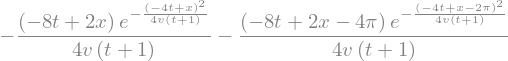

In [3]:
#Partially differentiate with respect to x
phiprime = phi.diff(x)

phiprime

In [4]:
#Full initial condition
u = -2 * v * (phiprime / phi) + 4

u

#Create the initial condition function
ufunc = lambdify((t, x, v), u)
print(ufunc(1, 4, 3))

3.49170664206445


In [5]:
## Creating the actual initial conditions
import matplotlib.pyplot as plt


nx = 101 #Number of x positions
steps = 100 #Number of time steps
dx = 2 * np.pi / (nx - 1) #Difference in x between adjacent positions
v = .07 #Viscosity
dt = dx * v #For some reason the time step depends on viscosity?

x = np.linspace(0, 2 * np.pi, nx)
unext = np.empty(nx)
t = 0

u = np.asarray([ufunc(t, x0, v) for x0 in x])

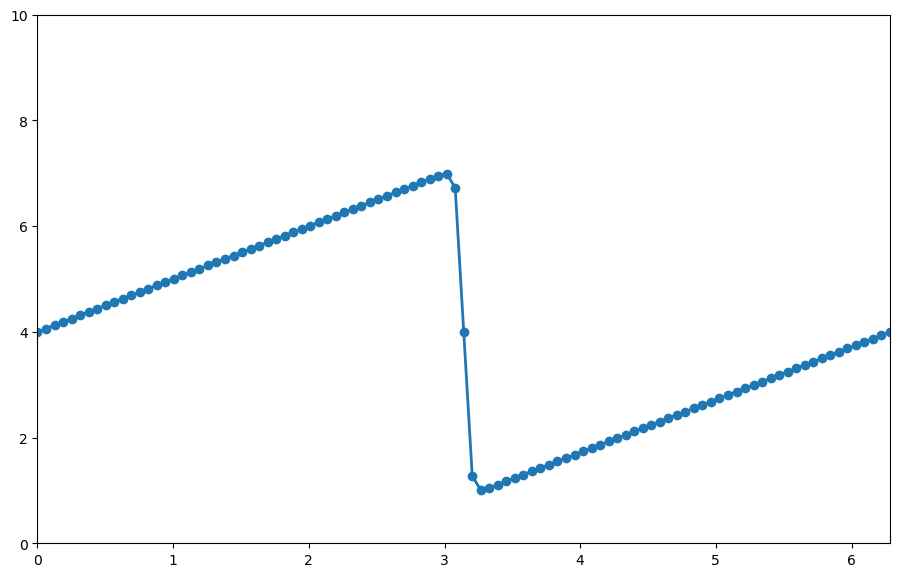

In [6]:
#Plot initial conditions
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);

In [7]:
#update equation

def update(nx, u, dt, dx, v):
    nextu = np.zeros(nx)
    
    #Loop over every position
    for i in range(nx):
        nextu[i] = u[i%nx] - u[i%nx] * dt / dx *(u[i%nx] - u[(i-1)%nx]) + v * dt / dx**2 *\
                (u[(i+1)%nx] - 2 * u[i%nx] + u[(i-1)%nx])
        

    u, nextu = nextu, u
    
    return u


#Analytical solution
u_analytical = np.asarray([ufunc(steps * dt, xi, v) for xi in x])

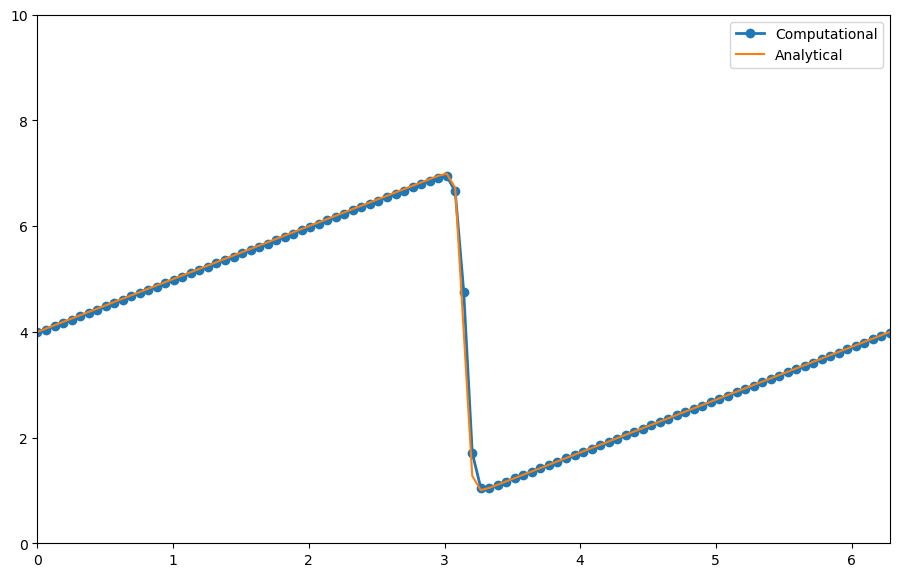

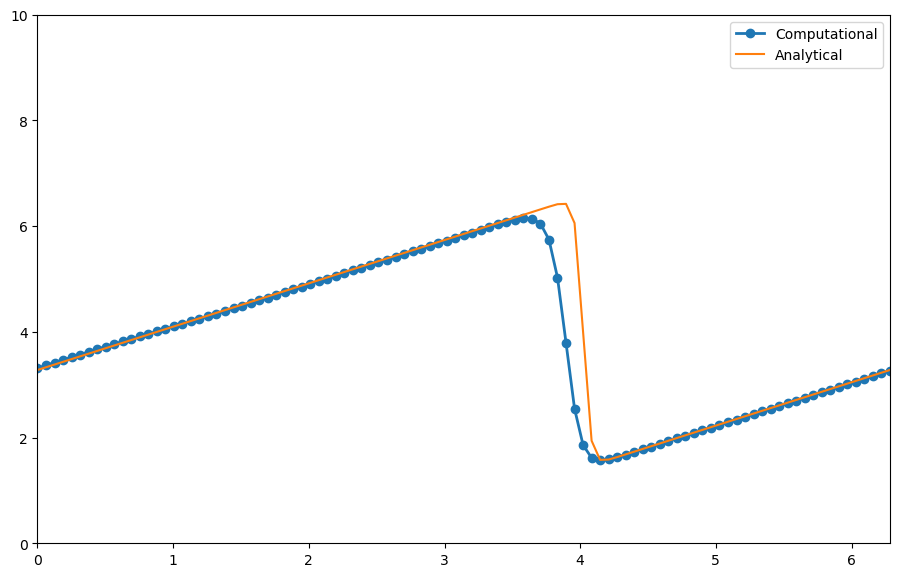

In [8]:
for i in range(steps):
    u = update(nx, u, dt, dx, v)
    
    u_analytical = np.asarray([ufunc(i * dt, xi, v) for xi in x])

    if i % 50 == 0:
        plt.figure(figsize=(11, 7), dpi=100)
        plt.plot(x,u, marker='o', lw=2, label='Computational')
        plt.plot(x, u_analytical, label='Analytical')
        plt.xlim([0, 2 * np.pi])
        plt.ylim([0, 10])
        plt.legend();